In [ ]:
# PCA with scikitlearn on Breast Cancer Dataset

**Author:** Dr. Parul Kulshreshtha

**Date:** December 31, 2025

PCA is a statistical procedure used to find linearly uncorrelated components that explain as much of the variation in a dataset as possible. In this way, it performs dimensionality reduction, meaning that we find a simpler or lower-dimensional representation of a more complex, or higher-dimensional dataset, thereby giving us a handle on key features that help explain the data in a powerful way. This
step of finding explanatory features is a key first step in machine learning.
In this recipe, we will implement PCA using the scikit-learn library. 
Scikit-learn is one of the fundamental
Python libraries for machine learning. PCA is a form of unsupervised machine learning – meaning we don’t provide information about the class of the sample. 
We will import the breast cancer dataset by using the sklearn.datasets
package. 

In [4]:
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 67.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 92.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 92.4 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/5 [numpy]  WARNING: The scripts f2py and numpy-config are installed in '/Users/dr.parul/Library/Python/3.9/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [scikit-learn] [scikit-learn]


In [5]:
!pip3 install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 78.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 13.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━  5/10 [fonttools]  WARNING: The scripts fonttools, pyftmerge, pyftsubset and ttx are installed in '/Users/dr.parul/Library/Python/3.9/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [matplotlib]0 [matplotlib]


In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

We imported the breast cancer dataset by using the sklearn.datasets
package. We also brought in the PCA model from the sklearn.decomposition package.
This package contains several other variations of matrix decomposition or dimensionality
reduction techniques, such as FastICA or truncated singular value decomposition. Next,
we bring in StandardScaler from the preprocessing package. Most machine learning algorithms expect features to be on a standard scale that looks like a Gaussian, with a mean of 0 and a variance of 1 – this is what we use StandardScaler for.

In [8]:
#Next, we’ll load in our dataset:
bc_data = load_breast_cancer()
X = bc_data.data
y = bc_data.target

In [9]:
#print out the type of bc_data like this:
type(bc_data)

sklearn.utils._bunch.Bunch

In [10]:
#we will normalize the data with StandardScaler, as we discussed before:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
#we have our normalized data in the X_scaled array. Next, we’ll perform the PCA:
bc_pca = PCA(n_components=3)
X_bc_pca = bc_pca.fit_transform(X_scaled)

/Users/dr.parul/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/dr.parul/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/dr.parul/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/dr.parul/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/dr.parul/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/dr.parul/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul

In [12]:
import numpy as np

print(np.isnan(X_scaled).sum())  # Count NaN values
print(np.isinf(X_scaled).sum())  # Count infinite values

0
0


In [13]:
print(X_bc_pca.shape)
print(bc_pca.explained_variance_ratio_)

(569, 3)
[0.44272026 0.18971182 0.09393163]


In [14]:
#let’s use the pandas DataFrame function to turn our PCA results array into a DataFrame
bc_pca_df = pd.DataFrame(X_bc_pca, columns=[
'PC1', 'PC2', 'PC3'])
bc_pca_df['label'] = y

In [15]:
#check the dataframe, The label column shows 0 for malignant and 1 for benign.
bc_pca_df.head()

,PC1,PC2,PC3,label
0,9.192837,1.948583,-1.123166,0
1,2.387802,-3.768172,-0.529293,0
2,5.733896,-1.075174,-0.551748,0
3,7.122953,10.275589,-3.232790,0
4,3.935302,-1.948072,1.389767,0


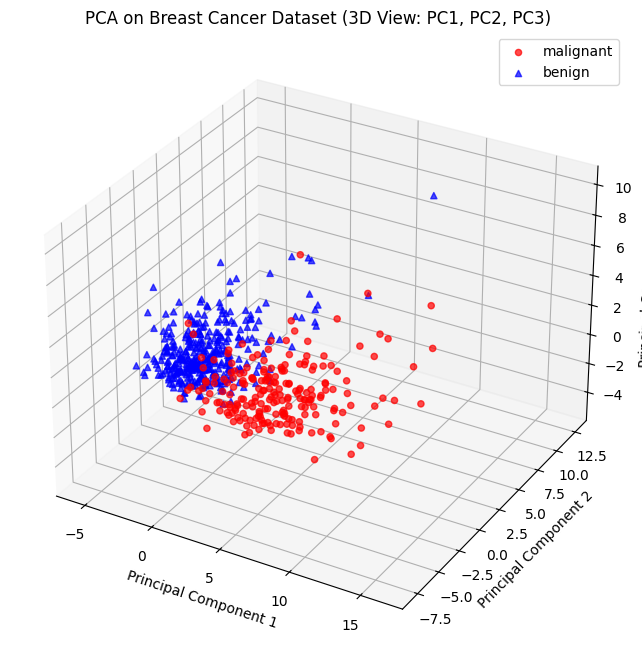

In [17]:
 #let’s plot the results!
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label, color, marker in zip([0, 1], ['red', 'blue'], ['o', '^']):
    subset = bc_pca_df[bc_pca_df['label'] == label]
    ax.scatter(
        subset['PC1'], subset['PC2'], subset['PC3'],
        c=color, label=bc_data.target_names[label],
        marker=marker, alpha=0.7
    )

ax.set_title('PCA on Breast Cancer Dataset (3D View: PC1, PC2, PC3)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

In [18]:
#Now, lets check how well the principal components explain the data in a more numeric fashion:
explained_variance = bc_pca.explained_variance_ratio_

for i, variance in enumerate(explained_variance, 1):
    print(f"Explained variance for PC{i}: {variance:.2f}")

cumulative_variance = explained_variance.sum()
print(f"Total variance explained by the first 3 components: {cumulative_variance:.2f}")

Explained variance for PC1: 0.44
Explained variance for PC2: 0.19
Explained variance for PC3: 0.09
Total variance explained by the first 3 components: 0.73


By reducing from 30 features to just 3, you still retain about 73% of the information in the original data. PC1 alone captures nearly half of the variance, which is why it's the most important component for separating the classes.

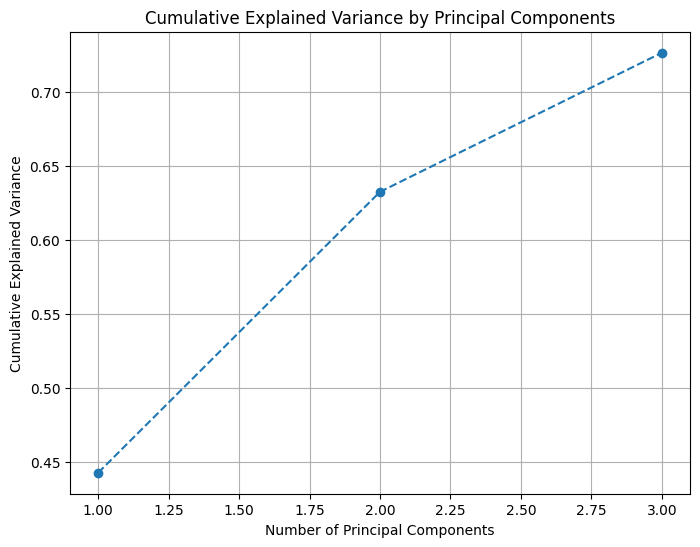

In [20]:
#Finally, we can graph the cumulative variance explained by the components:
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(
range(1, len(cumulative_variance) + 1),
cumulative_variance,
marker='o', linestyle='--'
)
plt.title(
'Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

This graph shows how much of the original data's information is captured as you add each principal component:
Reading the points:

1 component: ~44% of variance explained
2 components: ~63% of variance explained
3 components: ~73% of variance explained

Key interpretations:

PC1 is the most informative as it alone captures 44% of the variance from all 30 original features.
Diminishing returns — Each additional component adds less new information. PC2 adds ~19%, PC3 adds only ~9%.
73% with 3 components — You reduced 30 features to 3 while keeping nearly three-quarters of the information. This is a 90% reduction in dimensions with only 27% information loss.
The curve is still rising — If you need more variance explained (say 90% or 95%), you'd need more components. One could check how many are needed:

In [21]:
pca_full = PCA().fit(X_scaled)
cumsum = pca_full.explained_variance_ratio_.cumsum()

# How many components for 95% variance?
n_components_95 = (cumsum >= 0.95).argmax() + 1
print(f"Components needed for 95% variance: {n_components_95}")

Components needed for 95% variance: 10


/Users/dr.parul/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/dr.parul/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/dr.parul/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X


Key takeaway: we need 10 components to capture 95% of the variance.
So by using just 3 components, we reduced dimensions by 90% (30 → 3) while keeping 73% of the information. That's a great trade-off for visualization and often works well for classification too.
If we were to build a model and needed higher accuracy, we might use 10 components instead—still a 67% reduction in dimensions while keeping 95% of the information.